In [ ]:
!pip install gtsam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 41.0 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/egeozgul/GTSAM-Project/main/grid3D.g2o

--2025-12-02 22:19:03--  https://raw.githubusercontent.com/egeozgul/GTSAM-Project/main/grid3D.g2o
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7645820 (7.3M) [text/plain]
Saving to: ‘grid3D.g2o’

grid3D.g2o          100%[===================>]   7.29M  --.-KB/s    in 0.1s    

2025-12-02 22:19:03 (72.9 MB/s) - ‘grid3D.g2o’ saved [7645820/7645820]



In [ ]:
!wget https://raw.githubusercontent.com/egeozgul/GTSAM-Project/main/sphere_bignoise_vertex3.g2o

--2025-12-02 22:19:03--  https://raw.githubusercontent.com/egeozgul/GTSAM-Project/main/sphere_bignoise_vertex3.g2o
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2221712 (2.1M) [text/plain]
Saving to: ‘sphere_bignoise_vertex3.g2o’

sphere_bignoise_ver 100%[===================>]   2.12M  --.-KB/s    in 0.06s   

2025-12-02 22:19:04 (36.7 MB/s) - ‘sphere_bignoise_vertex3.g2o’ saved [2221712/2221712]



In [ ]:
!wget https://raw.githubusercontent.com/egeozgul/GTSAM-Project/main/torus3D.g2o

--2025-12-02 22:19:04--  https://raw.githubusercontent.com/egeozgul/GTSAM-Project/main/torus3D.g2o
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3262828 (3.1M) [text/plain]
Saving to: ‘torus3D.g2o’

torus3D.g2o         100%[===================>]   3.11M  --.-KB/s    in 0.08s   

2025-12-02 22:19:04 (41.0 MB/s) - ‘torus3D.g2o’ saved [3262828/3262828]



# **Loading Files**

In [ ]:
import gtsam

# Dictionary to store all loaded graphs
graphs_3d = {}

# List of files to load
files_3d = [
    "grid3D.g2o",
    "sphere_bignoise_vertex3.g2o",
    "torus3D.g2o"
]

print("Loading 3D graph files...")
print("="*60)

for filename in files_3d:
    print(f"\nLoading {filename}...")

    try:
        # Load 3D graph
        graph, initial = gtsam.readG2o(filename, is3D=True)

        graphs_3d[filename] = {
            'graph': graph,
            'initial': initial,
            'num_factors': graph.size(),
            'num_poses': initial.size()
        }

        print(f"  ✓ Loaded successfully")
        print(f"    - Factors: {graph.size()}")
        print(f"    - Poses: {initial.size()}")
        print(f"    - Initial error: {graph.error(initial):,.2f}")

    except Exception as e:
        print(f"  ✗ Failed to load: {e}")

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
for filename, data in graphs_3d.items():
    print(f"\n{filename}:")
    print(f"  Factors: {data['num_factors']}")
    print(f"  Poses: {data['num_poses']}")
    print(f"  Initial error: {data['graph'].error(data['initial']):,.2f}")

Loading 3D graph files...

Loading grid3D.g2o...
  ✓ Loaded successfully
    - Factors: 22236
    - Poses: 8000
    - Initial error: 95,280,764.18

Loading sphere_bignoise_vertex3.g2o...
  ✓ Loaded successfully
    - Factors: 8647
    - Poses: 2200
    - Initial error: 165,629,548.02

Loading torus3D.g2o...
  ✓ Loaded successfully
    - Factors: 9048
    - Poses: 5000
    - Initial error: 2,400,615.02

SUMMARY

grid3D.g2o:
  Factors: 22236
  Poses: 8000
  Initial error: 95,280,764.18

sphere_bignoise_vertex3.g2o:
  Factors: 8647
  Poses: 2200
  Initial error: 165,629,548.02

torus3D.g2o:
  Factors: 9048
  Poses: 5000
  Initial error: 2,400,615.02


# **Applying LM on all 3 datasets**

In [ ]:

print("="*60)
print("APPLYING LEVENBERG-MARQUARDT TO ALL DATASETS")
print("="*60)


import gtsam
import time

# Dictionary to store results for LM
results_lm = {}

datasets = ['grid3D.g2o', 'sphere_bignoise_vertex3.g2o', 'torus3D.g2o']

for dataset_name in datasets:
    print(f"\n{'='*60}")
    print(f"Processing: {dataset_name}")
    print(f"{'='*60}")

    graph = graphs_3d[dataset_name]['graph']
    initial = graphs_3d[dataset_name]['initial']

    print(f"Poses: {initial.size()}, Factors: {graph.size()}")
    print(f"Initial error: {graph.error(initial):,.2f}")

    # Optimize with Levenberg-Marquardt
    print("\nOptimizing with Levenberg-Marquardt...")
    start_time = time.time()

    try:
        params = gtsam.LevenbergMarquardtParams()
        params.setVerbosity("ERROR")
        optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initial, params)
        result = optimizer.optimize()

        end_time = time.time()

        final_error = graph.error(result)
        initial_error = graph.error(initial)
        improvement = ((initial_error - final_error) / initial_error * 100)

        # Store results
        results_lm[dataset_name] = {
            'success': True,
            'initial': initial,
            'result': result,
            'graph': graph,
            'initial_error': initial_error,
            'final_error': final_error,
            'improvement': improvement,
            'time': end_time - start_time,
            'iterations': optimizer.iterations()
        }

        print(f"✓ Optimization successful!")
        print(f"  Initial error: {initial_error:,.2f}")
        print(f"  Final error: {final_error:,.2f}")
        print(f"  Improvement: {improvement:.2f}%")
        print(f"  Iterations: {optimizer.iterations()}")
        print(f"  Time: {end_time - start_time:.4f}s")

    except Exception as e:
        results_lm[dataset_name] = {
            'success': False,
            'initial': initial,
            'graph': graph,
            'error_message': str(e),
            'initial_error': graph.error(initial)
        }
        print(f"✗ LM failed: {str(e)}")

# Summary
print("\n" + "="*60)
print("SUMMARY - LEVENBERG-MARQUARDT")
print("="*60)
print(f"{'Dataset':<35} {'Status':<12} {'Initial Error':<18} {'Final Error':<18} {'Improvement':<12} {'Time':<10}")
print("-"*110)

for dataset_name in datasets:
    result = results_lm[dataset_name]
    if result['success']:
        status = "✓ Success"
        initial_err = f"{result['initial_error']:,.2f}"
        final_err = f"{result['final_error']:,.2f}"
        improvement = f"{result['improvement']:.2f}%"
        time_str = f"{result['time']:.4f}s"
        print(f"{dataset_name:<35} {status:<12} {initial_err:<18} {final_err:<18} {improvement:<12} {time_str:<10}")
    else:
        status = "✗ Failed"
        initial_err = f"{result['initial_error']:,.2f}"
        print(f"{dataset_name:<35} {status:<12} {initial_err:<18} {'N/A':<18} {'N/A':<12} {'N/A':<10}")

print("\n" + "="*60)
successful_count = sum(1 for r in results_lm.values() if r['success'])
print(f"Successfully optimized {successful_count}/{len(datasets)} datasets")
print("Results stored in 'results_lm' dictionary")
print("Access individual results with: results_lm['grid3D.g2o']")
print("="*60)

APPLYING LEVENBERG-MARQUARDT TO ALL DATASETS

Processing: grid3D.g2o
Poses: 8000, Factors: 22236
Initial error: 95,280,764.18

Optimizing with Levenberg-Marquardt...
✓ Optimization successful!
  Initial error: 95,280,764.18
  Final error: 357,569.48
  Improvement: 99.62%
  Iterations: 100
  Time: 2638.8044s

Processing: sphere_bignoise_vertex3.g2o
Poses: 2200, Factors: 8647
Initial error: 165,629,548.02

Optimizing with Levenberg-Marquardt...
✓ Optimization successful!
  Initial error: 165,629,548.02
  Final error: 3,852,476.87
  Improvement: 97.67%
  Iterations: 22
  Time: 10.3337s

Processing: torus3D.g2o
Poses: 5000, Factors: 9048
Initial error: 2,400,615.02

Optimizing with Levenberg-Marquardt...
✓ Optimization successful!
  Initial error: 2,400,615.02
  Final error: 29,981.47
  Improvement: 98.75%
  Iterations: 52
  Time: 34.6244s

SUMMARY - LEVENBERG-MARQUARDT
Dataset                             Status       Initial Error      Final Error        Improvement  Time      
----------

# **Results**


Visualizing grid3D.g2o...


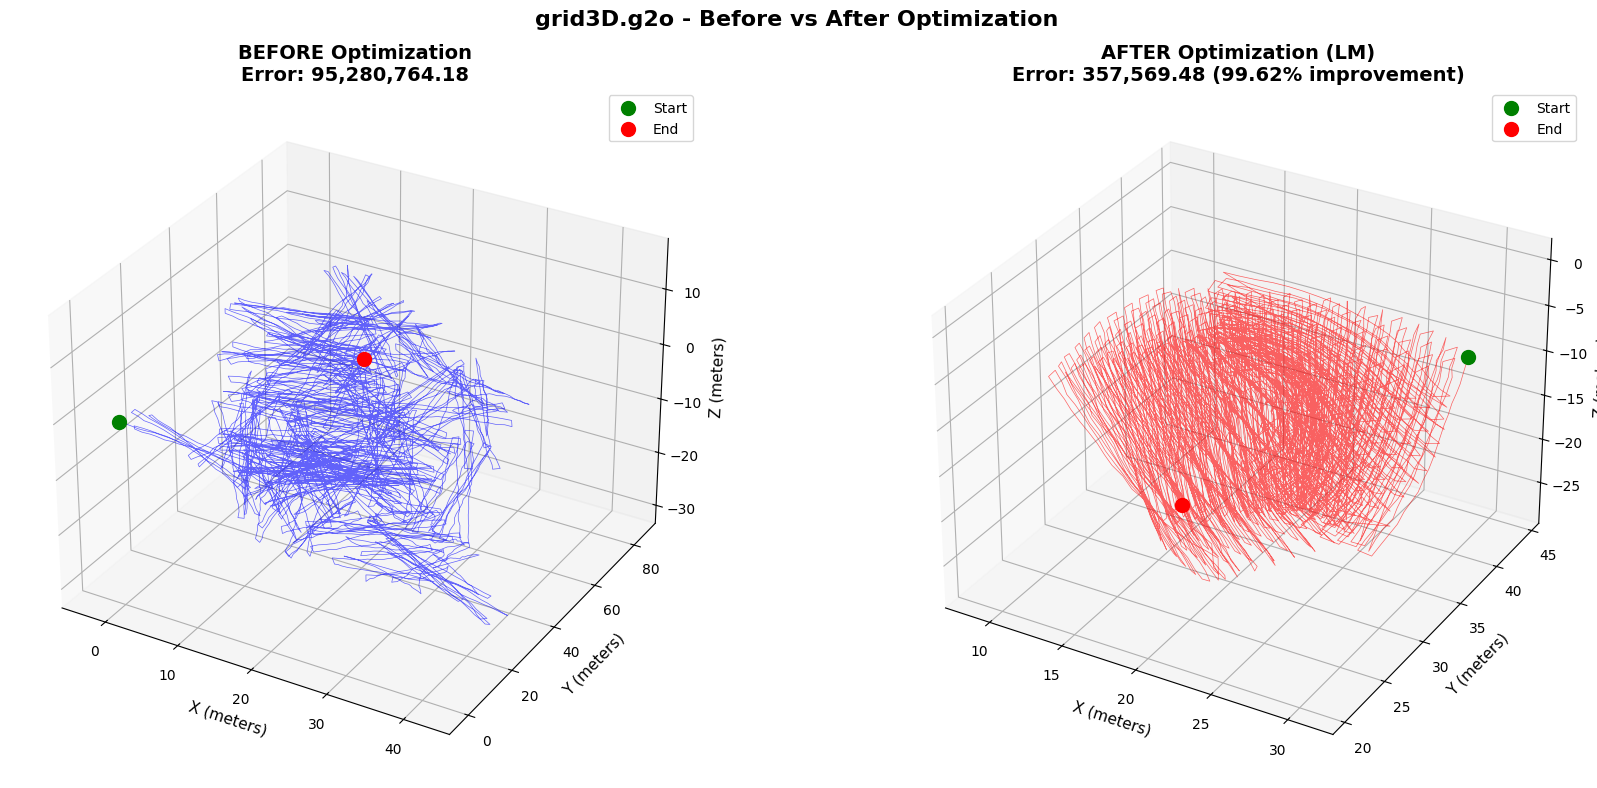


  Trajectory statistics for grid3D.g2o:
    Initial - X: [-2.77, 42.58], Y: [-2.01, 84.79], Z: [-30.11, 15.69]
    Optimized - X: [8.55, 31.24], Y: [20.31, 44.28], Z: [-27.70, 0.27]
    Initial trajectory length: 8,422.60 meters
    Optimized trajectory length: 7,727.21 meters
    Loop closure error (start-to-end distance):
      Initial: 86.39 meters
      Optimized: 25.79 meters
      Improvement: 60.61 meters

Visualizing sphere_bignoise_vertex3.g2o...


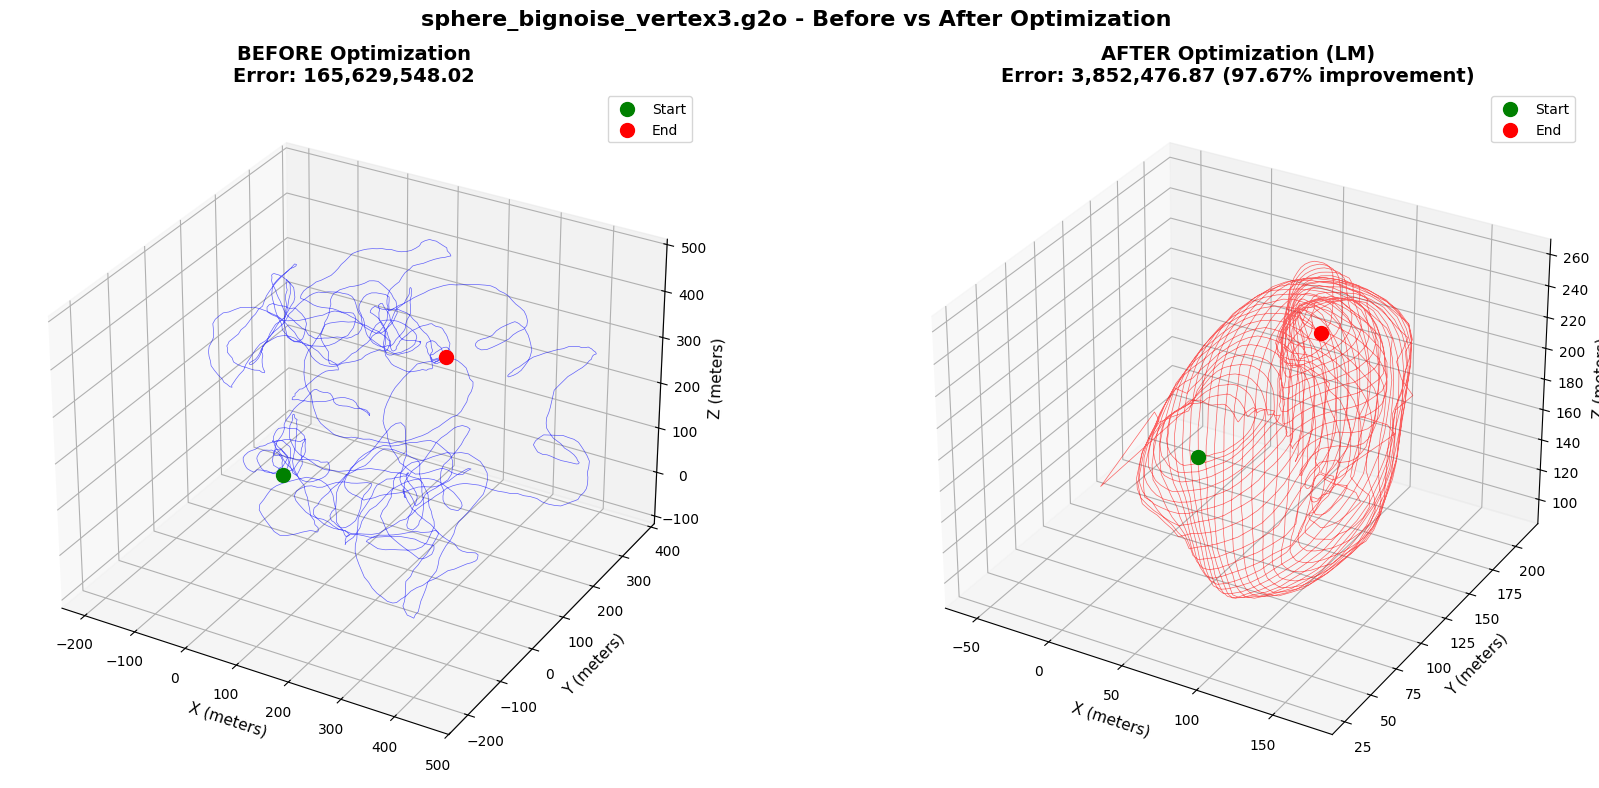


  Trajectory statistics for sphere_bignoise_vertex3.g2o:
    Initial - X: [-198.79, 452.90], Y: [-214.52, 369.30], Z: [-77.61, 471.31]
    Optimized - X: [-55.71, 171.83], Y: [26.72, 211.29], Z: [95.41, 257.64]
    Initial trajectory length: 19,651.48 meters
    Optimized trajectory length: 17,248.75 meters
    Loop closure error (start-to-end distance):
      Initial: 362.41 meters
      Optimized: 92.72 meters
      Improvement: 269.69 meters

Visualizing torus3D.g2o...


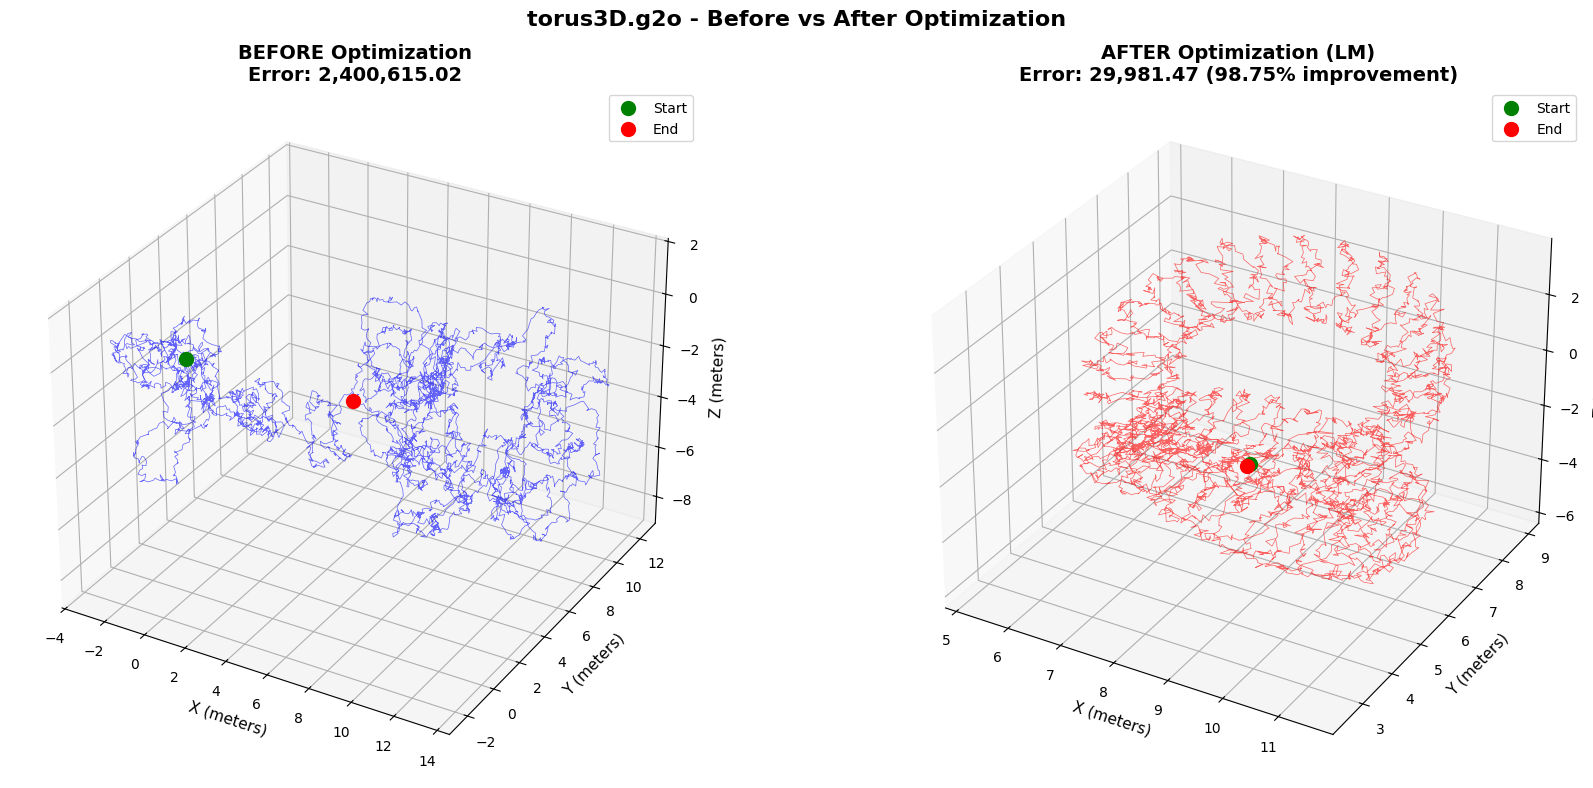


  Trajectory statistics for torus3D.g2o:
    Initial - X: [-2.96, 13.38], Y: [-2.28, 12.28], Z: [-8.38, 1.40]
    Optimized - X: [5.25, 11.51], Y: [2.48, 8.93], Z: [-5.74, 3.32]
    Initial trajectory length: 845.75 meters
    Optimized trajectory length: 662.82 meters
    Loop closure error (start-to-end distance):
      Initial: 8.77 meters
      Optimized: 0.58 meters
      Improvement: 8.18 meters

All visualizations complete!


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def extract_trajectory_3d(values):
    """Extract x, y, z coordinates from GTSAM Values (Pose3)"""
    x_coords = []
    y_coords = []
    z_coords = []
    for i in range(values.size()):
        try:
            pose = values.atPose3(i)
            x_coords.append(pose.x())
            y_coords.append(pose.y())
            z_coords.append(pose.z())
        except:
            pass
    return np.array(x_coords), np.array(y_coords), np.array(z_coords)

# Visualize all three datasets
datasets = ['grid3D.g2o', 'sphere_bignoise_vertex3.g2o', 'torus3D.g2o']

for dataset_name in datasets:
    print(f"\nVisualizing {dataset_name}...")

    if not results_lm[dataset_name]['success']:
        print(f"  Skipping - optimization failed")
        continue

    # Extract data
    initial = results_lm[dataset_name]['initial']
    result = results_lm[dataset_name]['result']
    initial_error = results_lm[dataset_name]['initial_error']
    final_error = results_lm[dataset_name]['final_error']
    improvement = results_lm[dataset_name]['improvement']

    # Get trajectories
    x_initial, y_initial, z_initial = extract_trajectory_3d(initial)
    x_optimized, y_optimized, z_optimized = extract_trajectory_3d(result)

    # Create figure with two 3D subplots
    fig = plt.figure(figsize=(18, 8))

    # Before optimization
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(x_initial, y_initial, z_initial, 'b-', linewidth=0.5, alpha=0.6)
    ax1.scatter(x_initial[0], y_initial[0], z_initial[0], c='green', s=100, marker='o', label='Start', zorder=5)
    ax1.scatter(x_initial[-1], y_initial[-1], z_initial[-1], c='red', s=100, marker='o', label='End', zorder=5)
    ax1.set_xlabel('X (meters)', fontsize=11)
    ax1.set_ylabel('Y (meters)', fontsize=11)
    ax1.set_zlabel('Z (meters)', fontsize=11)
    ax1.set_title(f'BEFORE Optimization\nError: {initial_error:,.2f}', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # After optimization
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot(x_optimized, y_optimized, z_optimized, 'r-', linewidth=0.5, alpha=0.6)
    ax2.scatter(x_optimized[0], y_optimized[0], z_optimized[0], c='green', s=100, marker='o', label='Start', zorder=5)
    ax2.scatter(x_optimized[-1], y_optimized[-1], z_optimized[-1], c='red', s=100, marker='o', label='End', zorder=5)
    ax2.set_xlabel('X (meters)', fontsize=11)
    ax2.set_ylabel('Y (meters)', fontsize=11)
    ax2.set_zlabel('Z (meters)', fontsize=11)
    ax2.set_title(f'AFTER Optimization (LM)\nError: {final_error:,.2f} ({improvement:.2f}% improvement)',
                  fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

    # Match viewing angles for comparison
    ax2.view_init(elev=ax1.elev, azim=ax1.azim)

    # Main title
    plt.suptitle(f'{dataset_name} - Before vs After Optimization',
                 fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout()
    outname = {'grid3D.g2o': 'GTSAM_LM_grid3D.png', 'sphere_bignoise_vertex3.g2o': 'GTSAM_LM_sphere.png', 'torus3D.g2o': 'GTSAM_LM_torus.png'}[dataset_name]
    fig.savefig(outname, dpi=150, bbox_inches='tight')
    plt.show()

    # Print statistics
    print(f"\n  Trajectory statistics for {dataset_name}:")
    print(f"    Initial - X: [{x_initial.min():.2f}, {x_initial.max():.2f}], "
          f"Y: [{y_initial.min():.2f}, {y_initial.max():.2f}], "
          f"Z: [{z_initial.min():.2f}, {z_initial.max():.2f}]")
    print(f"    Optimized - X: [{x_optimized.min():.2f}, {x_optimized.max():.2f}], "
          f"Y: [{y_optimized.min():.2f}, {y_optimized.max():.2f}], "
          f"Z: [{z_optimized.min():.2f}, {z_optimized.max():.2f}]")

    # Calculate trajectory lengths
    initial_length = np.sum(np.sqrt(np.diff(x_initial)**2 + np.diff(y_initial)**2 + np.diff(z_initial)**2))
    optimized_length = np.sum(np.sqrt(np.diff(x_optimized)**2 + np.diff(y_optimized)**2 + np.diff(z_optimized)**2))

    print(f"    Initial trajectory length: {initial_length:,.2f} meters")
    print(f"    Optimized trajectory length: {optimized_length:,.2f} meters")

    # Loop closure error (distance between start and end)
    loop_error_initial = np.sqrt((x_initial[0] - x_initial[-1])**2 +
                                  (y_initial[0] - y_initial[-1])**2 +
                                  (z_initial[0] - z_initial[-1])**2)
    loop_error_optimized = np.sqrt((x_optimized[0] - x_optimized[-1])**2 +
                                    (y_optimized[0] - y_optimized[-1])**2 +
                                    (z_optimized[0] - z_optimized[-1])**2)

    print(f"    Loop closure error (start-to-end distance):")
    print(f"      Initial: {loop_error_initial:.2f} meters")
    print(f"      Optimized: {loop_error_optimized:.2f} meters")
    print(f"      Improvement: {loop_error_initial - loop_error_optimized:.2f} meters")

print("\n" + "="*60)
print("All visualizations complete!")
print("="*60)